In [ ]:
! ls

aug	      cytounet	LICENSE      README.rst        setup.py
changelog.md  data	predictions  requirements.txt  unet_embryo.hdf5
_config.yml   examples	README.md    setup.cfg


In [ ]:
! git clone https://github.com/Nelson-Gon/cytounet.git

In [4]:
%cd cytounet

/content/cytounet


In [5]:
from cytounet.model import *
from cytounet.data import *
from cytounet.augmentation import *

Using TensorFlow backend.


In [6]:
!  ls examples/BBBC003_v1/

images	truth


In [8]:
data_generator_args =  dict(rotation_range=90,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
! if [ ! -d "aug" ]; then mkdir aug;fi

In [12]:
!ls

changelog.md  cytounet	examples  README.md   requirements.txt	setup.py
_config.yml   data	LICENSE   README.rst  setup.cfg


In [13]:
# use actual paths, for some reason paths were messed up
train_gen = trainGenerator(2, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 423, target_size = (256, 256), save_to_dir=None)

In [14]:
model = unet(input_size = (256, 256, 1), metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-4)

In [15]:
history = model.fit_generator(train_gen, steps_per_epoch=2000,epochs=5)

Epoch 1/5
Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
2000/2000 [==============================] - 1069s 535ms/step - loss: 0.0422 - accuracy: 0.9839
Epoch 2/5
2000/2000 [==============================] - 1054s 527ms/step - loss: 0.0115 - accuracy: 0.9928
Epoch 3/5
2000/2000 [==============================] - 1055s 528ms/step - loss: 0.0086 - accuracy: 0.9933
Epoch 4/5
2000/2000 [==============================] - 1051s 525ms/step - loss: 0.0075 - accuracy: 0.9935
Epoch 5/5
2000/2000 [==============================] - 1055s 528ms/step - loss: 0.0067 - accuracy: 0.9937


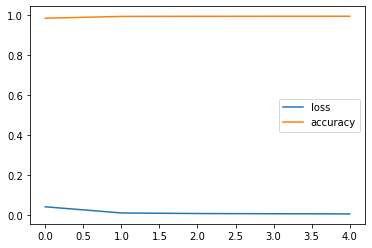

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])

In [31]:
# make aug data for testing, best to have actual test/validation data
train_gen = trainGenerator(2, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 423, target_size = (256, 256), save_to_dir="aug")

In [32]:
batches = 5
for index, batch in enumerate(train_gen):
  if index > batches:
    break

Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.


In [33]:
! ls aug

In [35]:
! if [  -d "aug/images" ];then  mv aug/image_* aug/images && mv aug/mask_* aug/masks;fi

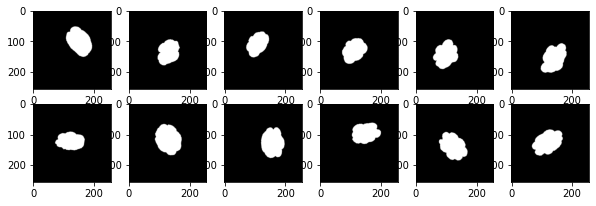

In [36]:
show_images("aug/masks", image_suffix="png", number = 12)

In [24]:
!  ls data

test  test-volume.tif  train  train-labels.tif	train-volume.tif


In [37]:
test_images = testGenerator("aug/images", 10, image_suffix="png")

In [38]:
model.save("unet_embryo.hdf5")

In [39]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [40]:
results = model.predict_generator(test_images, 10, verbose=1)

10/10 [==============================] - 2s 163ms/step


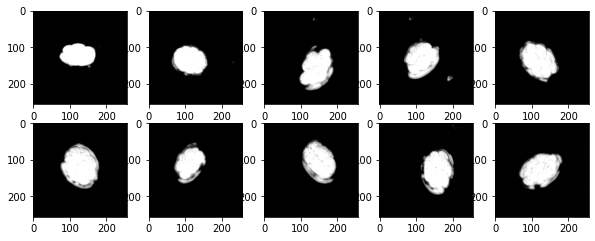

In [41]:
show_images(results, number = 10)

In [42]:
! if [ ! -d "predictions" ];then mkdir predictions;fi

In [43]:
saveImages("predictions", results,"predicted_", image_suffix="png")

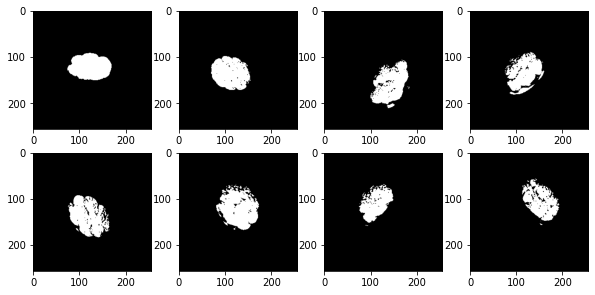

In [44]:
show_images("predictions",image_suffix="png",number = 8)